# Architecture 1b - Multiple column, multiple timestep forecasting, denoised data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
# from Data_sorting import Data_formatter_cycles

In [3]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Data/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:-1,:6]
# X = X.drop('I', axis = 1)
y = data.iloc[2:,:6]

In [4]:
X_numpy = X.values
y_numpy = y.values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

In [5]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim = 6))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100

3601/3601 [==============================] - 3s 788us/step - loss: 0.0543
Epoch 2/100
3601/3601 [==============================] - 3s 745us/step - loss: 8.9319e-04
Epoch 3/100
3601/3601 [==============================] - 3s 825us/step - loss: 2.6630e-04
Epoch 4/100
3601/3601 [==============================] - 3s 793us/step - loss: 1.0551e-04
Epoch 5/100
3601/3601 [==============================] - 3s 777us/step - loss: 8.2048e-05
Epoch 6/100
3601/3601 [==============================] - 3s 793us/step - loss: 8.2689e-05
Epoch 7/100
3601/3601 [==============================] - 3s 744us/step - loss: 7.0708e-05
Epoch 8/100
3601/3601 [==============================] - 3s 760us/step - loss: 6.8455e-05
Epoch 9/100
3601/3601 [==============================] - 3s 750us/step - loss: 7.0399e-05
Epoch 10/100
3601/3601 [==============================] - 3s 770us/step - loss: 6.2643e-05
Epoch 11/100
3601/3601 [==============================] - 3s 758us/step - loss: 6.1808e-05
Epoch 12/

901/901 [==============================] - 1s 617us/step - loss: 3.6938e-06
Mean Squared Error on Test Set: 3.693810640470474e-06


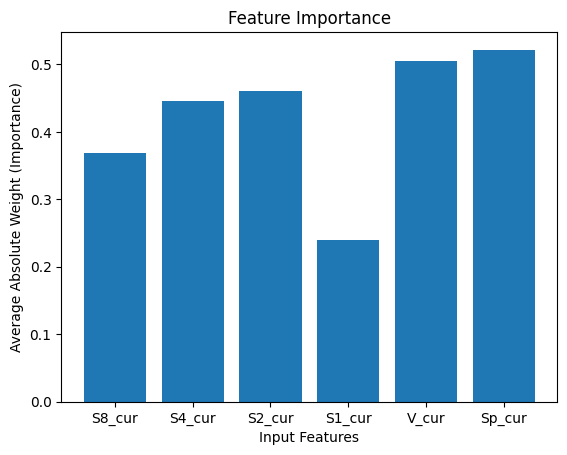

In [6]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# # Get the learned weights of the first dense layer
# weights = model.layers[0].get_weights()[0]

# # Compute the feature importance as the average absolute weight for each feature
# feature_importance = np.mean(np.abs(weights), axis=1)

# # Plot the importance of each input feature
# plt.bar(range(len(feature_importance)), feature_importance)
# plt.xlabel('Input Features')
# plt.ylabel('Average Absolute Weight (Importance)')
# plt.xticks(range(len(feature_importance)), ['S8_cur', 'S4_cur', 'S2_cur', 'S1_cur', 'V_cur', 'Sp_cur'])
# plt.title('Feature Importance')
# plt.show()

In [8]:
no_predictions = 2000

start = 1500

input = np.array([X_numpy[start]])

output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Data/Scales.xlsx')

for i in range(no_predictions):
    
    next_prediction_array = model.predict(input)

    input = next_prediction_array

    # print(input)

    output.append(input[0])


1/1 [==============================] - 0s 17ms/step


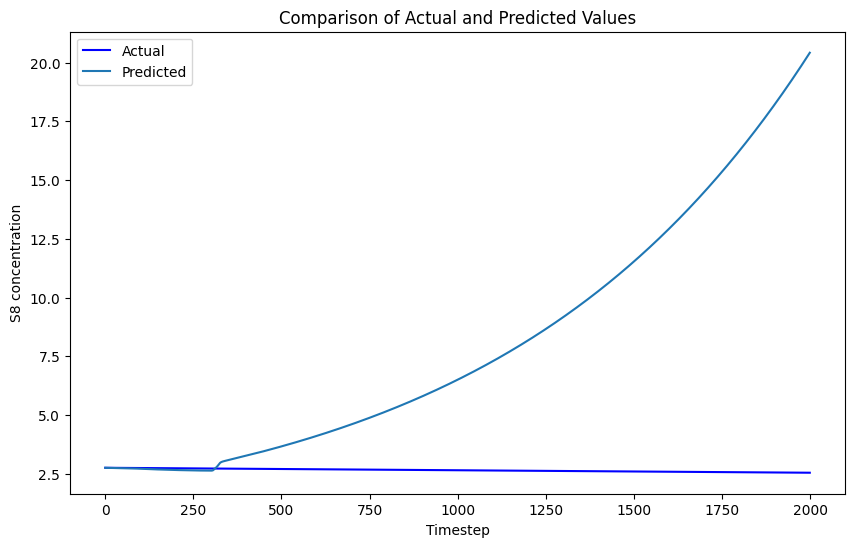

In [9]:
plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[start + j])

# Extracting the first value from each entry in plot_actual
first_values_actual = [item[0] for item in plot_actual]

# Extracting the first value from each predicted array in output
first_values_predicted = [item[0] for item in output]

# Create a range for the x-axis
x_range = range(len(first_values_actual))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, first_values_actual, label='Actual', c = 'b')
plt.plot(x_range, first_values_predicted, label='Predicted')

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Timestep')
plt.ylabel('S8 concentration')
plt.legend()

# Show plot
plt.show()